## An Application of Minimum Spanning Tree in Deciphering String Ancestry Relationship

The following 7 strings were generated by taking an existing string and with a small probability either inserting a new character, deleting an existing character, or changing to a new character randomly. This created two child strings, each of these strings with a single character changed from their parent. And from the two child strings, four grandchild strings were created, two from each child. The 4 grandchild strings also have a single character changed from their parents. As result, we got 7 strings but unfortunately the order of the strings has been lost.
```
(0, 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC')
(1, 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA')
(2, 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA')
(3, 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA')
(4, 'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA')
(5, 'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC')
(6, 'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC')
```

Consider each of those strings as DNA strands. This assignment explores the tactics to determine the ancestry tree for given DNA strands. A DNA strand can be represented by a string comprising of four bases, A, C, G, and T. A string can be used to generate a child string as follows: for each character in the original string, there is $p_1$ chance that it is removed, $p_2$ chance that a base is inserted into that position, $p_3$ chance that it is altered by another base, and $p_4$ chance that it is kept the same. $p_1+p_2+p_3+p_4=1$ and $p_1$, $p_2$, and $p_3$ are small, so that by the end of the process of generating new string, the new string and the parent string should look mostly similar. By the end of the notebook, a general strategy for inferring parent-child relationships among the DNA strands and estimating the probabilities $p_1,p_2,p_3$ and $p_4$ are proposed.

# 1. Write python code to give the length of the longest common subsequence for two strings.

Pseudo code is adapted from Cormen et al. (p.394). 

In [187]:
# import useful packages
import numpy as np
import random
import matplotlib.pyplot as plt

In [316]:
def lcs_length(x, y, save_space = True):
    """
    Gives the table c containing the lengths of the longest common substring 
    between every pair of substrings of x and y, following Cormen et al's 
    pseudocode (p.394). If save_space is set to True, table b will not be 
    constructed. 
    
    Inputs:
    - x, y: strings
    - save_space: boolean, whether to construct table b (see Cormen et al.,
    p.394)
    
    Outputs:
    - c: numpy array;
        * c[i,j] is the length of the longest common substring of x[i-1] 
        and y[j-1] if i > 0 and j > 0
        * c[i,j] = 0 if i = 0 or j = 0 (the length of the longest common 
        substring of an empty string and another string)
    - b: numpy array; as defined in Cormen et al.
        * '||': arrow pointing upward in Cormen et al.
        * '=': arrow pointing left in Cormen et al.
        * '\\': arrow pointing upward to the left in Cormen et al.
    """
    
    m = len(x)
    n = len(y)
    
    # initialize b and c
    b = np.chararray((m,n), 
                     unicode=True, itemsize = 2) if not save_space else None
    c = np.zeros((m+1,n+1))
    
    # fill in the table in a row-first manner 
    for i in range(m): 
        for j in range(n):
            
            # If the last characters of X_i and Y_j are the same, then the 
            # longest common subsequence of X_i and Y_i is just the longest 
            # common subsequence of X_i[:-1] and X_j[:-1] plus the same last 
            # character
            if x[i] == y[j]:
                c[i+1,j+1] = c[i,j] + 1
                if not save_space:
                    b[i,j] = '\\' 
                    
            # If the last characters of X_i and Y_j are different, then the 
            # longest common subsequence of X_i and Y_i is either the longest 
            # common subsequence of X_i[:-1] and Y_j or that of X_i and 
            # Y_j[:-1], whichever is longer
            elif c[i,j+1] >= c[i+1,j]:
                c[i+1,j+1] = c[i,j+1]
                if not save_space:
                    b[i,j] = '||' 
            else:
                c[i+1,j+1] = c[i+1,j]
                if not save_space:
                    b[i,j] = '='
                    
    return c if save_space else (c,b)
        
### Test ###
# These test cases for lcs_length with save_space = False
# are based on the textbook results on page 395
x = 'ABCBDAB'
y = 'BDCABA'
results = np.array([[0,0,0,0,0,0,0],
                    [0,0,0,0,1,1,1],
                    [0,1,1,1,1,2,2],
                    [0,1,1,2,2,2,2],
                    [0,1,1,2,2,3,3],
                    [0,1,2,2,2,3,3],
                    [0,1,2,2,3,3,4],
                    [0,1,2,2,3,4,4]])

for i in range(len(x)+1):
    x_i = x[:i]
    for j in range(len(y)+1):
        y_j = y[:j]
        assert(lcs_length(x_i, y_j)[-1,-1] == results[i,j])

# 2. Generate the table of the lengths of the longest common subsequences for every pair of strings.


In [318]:
strings = [(0, 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'),
           (1, 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA') ,
           (2, 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA') ,
           (3, 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA') ,
           (4, 'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA') ,
           (5, 'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC') ,
           (6, 'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC') 
          ]

# For the lower half of the table
n = len(strings)
lcs_length_table = np.zeros((n,n))
for i in range(n):
    for j in range(i+1):
        string1 = strings[i][1]
        string2 = strings[j][1]
        lcs_length_table[i,j] = lcs_length(string1, string2)[-1,-1]
print(lcs_length_table)

[[100.   0.   0.   0.   0.   0.   0.]
 [ 74.  90.   0.   0.   0.   0.   0.]
 [ 76.  67.  97.   0.   0.   0.   0.]
 [ 73.  72.  65.  96.   0.   0.   0.]
 [ 82.  80.  69.  81.  96.   0.   0.]
 [ 84.  70.  81.  71.  74. 111.   0.]
 [ 91.  71.  84.  69.  75.  97. 104.]]


From the above code result, we have the following table:



From the above code result, we have the following table:
![lcs table](images/lcs_table.png)

# 3. Manually examine the table, and infer the relationships between strings. Devise an algorithm in the general case which might be able to infer such a tree of relationships? Give any strengths or weaknesses of your suggested algorithm.

## Infering Ancestry Relationship From LCS

### Motivation

The LCS is one good metrics to measure the strength of the parent-child relationship among the strings. As a child is generated by mutating the parent string with a small probability of substitution, insertion, and removal, we expect that the child string is very similar to its parent, differing by a small number of characters. Therefore, the longer the LCS for two DNA strands, the more evidence it gives for the parent-child relationship between them.

### Method

From **table 1** of the LCS's above, we can construct a connected, undirected graph $G(V,E,w)$ with $V$ being the set of 7 strings ($|V|=7$), $E$ being the edges connecting every two strings. As each vertex $v$ in $V$ has a degree of 6, it follows that 
$$|E|=7\times 6/2=21$$
$w(u,v)$ gives the weight of the edge connecting string $u$ and $v$, and has the value exactly the same as the length of the lcs for the two strings. Additionally, we can depict the ancestry relationship for these strings by a binary, weighted tree. The weight of each edge in such a tree measures the strength of the parent-children relationship. It is intuitive that we want to build a tree from graph $G$ with all the nodes from $V$ and the edges being a subset of $E$, such that the sum of weights of the edges is maximized. If we negate all the weights, the objective becomes finding a binary tree from $G$ with minimum sum of weights. This is the **minimum spanning tree** problem in Cormen et al. (Chapter 23). 

(**#greedy**) We will follow the Kruskal's algorithm for finding the minimum spanning tree. The algorithm is straightforward. It first sorts all the edges $E$ in a non-decreasing order. At each iteration, it picks a smallest weighted edge among the edges that have not been picked and checks if the edge forms a cycle with any other two edges that have been picked. If it does not form any of such cycles, the edge and its associated keys are added to the solution. If it does forms a cycle, then the algorithm disregard that edge even for future choices and continually picks and checks the next-smallest weighted edges. The algorithm terminates when all edges have been considered, which is also when a minimum spanning tree is formed. In brief, Kruskal's algorithm repeatedly adds trees to a forest until they are unified as one single tree. The pseucode for this algorithm is specified in Cormen et al. (p.631). This is a greedy algorithm as at each iteration it picks a minimum weighted edge and adds the edge and the associated two nodes to the solution. The implementation is below.

### Minimum Spanning Trees Implementation

The implementation requires a data structure to support disjoint sets. This is because each set is used to contain vertices of a tree. The data structure should support three operations: 
1. $MAKE\_SET(u)$, which creates a set containing solely vertex $u$. This operation is used to make $|V|$ sets containing $|V|$ vertices of graph G at the beginning of the algorithm.
2. $FIND\_SET(u)$, which returns a unique set that contains $u$ (since the sets are disjoint). This is used whenever we find an edge $(u,v)$ with a smallest weight, we check to see if $u$ and $v$ are in the same set by checking if $FIND\_SET(u)=FIND\_SET(v)$. If so, we know that adding the edge $(u,v)$ will form a cycle in the forest, so we disregard the edge.
3. $UNION(u,v)$, which takes the union of the sets containing $u$ and $v$. This operation is called when we find an edge $(u,v)$ that is safe to add to the forest (when $FIND\_SET(u)$ and $FIND\_SET(v)$ are different).

Therefore, the implementation of finding a minimum spanning tree (MST) for graph G includes three components:
1. Implementing a data structure for disjoint sets. The linked list representation is chosen for reasons of simplicity, although, as will be shown later, this choice results in inferior time complexity compared to the tree representation of disjoint sets.

2. Creating the graph G.

3. Implenting the Kruskals' algorithm.

In [319]:
# 1. Linked list representation for disjoint sets
# specified in Cormen et al. Chapter 21 p.564.
# In order to do this, a data structure that supports
# disjoint sets is needed.

class Member(object):
    """
    A member of a set with two pointers:
    - One pointer to the set that contains it 
    - One pointer to another member.
    """
    def __init__(self, key, prev_obj = None, next_obj = None):
        self.key = key
        self.prev_obj = None
        self.next_obj = None
    
    def __eq__(self, other):
        """
        Two members are equal if they have the same key
        """
        return self.key == other.key
    
    
class Set(object):
    """
    A set with a size attribute giving the number of members
    in the set, and two pointers:
    - One pointer (head) to the first (or the representative)
    member of the set
    - One pointer (tail) to the last member
    """
    def __init__(self, head = None, tail = None):
        self.head = head
        self.tail = tail
        self.size = 0
        member = self.head
        while member:
            self.size += 1
            member = member.next_obj
        
class Disjoint_Sets(object):
    """
    Maintaining disjoint sets, supporting:
    - make_set: creates a new set containing one member
    - find_set: returns the unique set that contains a member. 
    - union: creates a new set that is the union of the sets that
    contain the two specified members, using the weighted-union 
    heuristic in Cormen et al.
    """
    def __init__(self, sets = []):
        self.sets = sets
        
    def make_set(self, member):
        """
        Creates a new set that contains the member. As there is only
        one member, the set's two pointers both point to the member.
        """
        new_set = Set(head = member, tail = member)
        self.sets.append(new_set)
        member.prev_obj = new_set
        
    def find_set(self, member):
        """
        Returns the set that contains the member, following the 
        pointer prev_obj of the member, as all members point to
        their enclosing set.
        
        """
        return member.prev_obj
    
    def union(self, member1, member2):
        """
        Creates a new set that is the union of the two sets set1 
        and set2 containing member1 and member2, respectively. 
        The weighted-union heuristic is used: because when two
        sets are unionized, pointers of all members in one set 
        must be changed to point to the other set, so it is more
        efficient to reset the pointers of members of the smaller 
        set. 
        """
        set1 = member1.prev_obj
        set2 = member2.prev_obj
        
        # get the smaller set
        if set1.size < set2.size:
            smaller = set1
            bigger = set2
        else:
            smaller = set2
            bigger = set1
        
        # reset the pointers and update the size of the new set
        bigger.tail.next_obj = smaller.head
        bigger.tail = smaller.tail
        obj = smaller.head
        while obj:
            bigger.size += 1
            obj.prev_obj = bigger
            obj = obj.next_obj

### Simple test based on results in textbook ###
keys = ['f', 'g', 'd', 'c', 'h', 'e', 'b']
members = [Member(key) for key in keys]
S = Disjoint_Sets()
for member in members:
    S.make_set(member)
S.union(members[0], members[1])
assert(S.find_set(members[0]).size==2)
S.union(members[0], members[2])
assert(S.find_set(members[0]).size==3)
S.union(members[3], members[4])
assert(S.find_set(members[4]).size==2)
S.union(members[4], members[5])
S.union(members[3], members[6])
assert(S.find_set(members[5]).size==4)
S.union(members[1], members[5])
assert(S.find_set(members[2]).size==7)

In [322]:
# 2. Objects that support creating the graph G
class Edge(object):
    """An edge in undirected graphs with two of its 
    associated vertices and weight"""
    
    def __init__(self, vertex1, vertex2, weight=None):
        self.vertices = (vertex1, vertex2)
        self.weight = weight
    
    def __eq__(self, other):
        """
        Determines if two edges are the same. As edges
        in an undirected graph, they are the same if
        the two vertices that define each edge are the
        same
        """
        set1 = set((self.vertices[0].key, self.vertices[1].key))
        set2 = set((other.vertices[0].key, other.vertices[1].key))
        return set1 == set2
        
        
class Undirected_Graph(object):
    """undirected, weighted graph, supporting:
    - add_vertex: includes a new vertex to the graph
    - add_edge: includes a new edge to the graph"""
    
    def __init__(self, vertices=None, edges=None):
        """
        - vertices: contains objects of class Member
        - edges: contains objects of class Edge
        """
        self.vertices = vertices if vertices else []
        self.edges = edges if edges else []
        self.E = len(self.edges) # |E|
        self.V = len(self.vertices) # |V|
    
    def __eq__(self, other):
        """Compares two graph"""
        
        for vertex in self.vertices:
            if not vertex in other.vertices:
                return False
        for edge in self.edges:
            if not edge in other.edges:
                return False
        return True
    
    def add_vertex(self, vertex):
        """adds a new vertex, updates |V|"""
        if not vertex in self.vertices:
            self.vertices.append(vertex)
            self.V += 1
    
    def add_edge(self, edge):
        """adds a new edge, updates |E|"""
        if not edge in self.edges:
            self.edges.append(edge)
            self.E += 1

### Test ###
a = Member('a')
b = Member('b')
c = Member('c')
d = Member('d')
e = Member('e')
edge1 = Edge(a,b,1)
edge2 = Edge(b,a,1)
edge3 = Edge(c,d,2)
edge4 = Edge(d,c,2)
# edges1 = [edge1, edge3]
# edges2 = [edge2, edge4]
graph1 = Undirected_Graph(vertices=[a,b,c,d],edges=[edge1,edge3])
graph2 = Undirected_Graph(vertices=[b,a,d,c], edges=[edge2,edge4])
assert(graph1 == graph2)

In [323]:
# 3. Implementing Kruskal's algorithm

# As the Kruskal's algorithm requires sorting the edges according
# to their weights, it is useful to have a subroutine that sorts 
# a list of such objects. Merge sort is chosen, as it can reach 
# the optimal complexity of a comparison sort algorithm (O(nlogn))

def merge_sort(A, attr, p, r):
    """
    Sorts the list A[p...s] of OBJECTS with attribute
    attr using two-way merge sort. This will modify A 
    in-place. 
    
    Inputs:
    - A: list of objects with attribute attr
    - attr: string, name of the attribute to sort on
    - p: int, the start index of the to-sort sublist of A
    - r: int, the end index of the to-sort sublist of A
    
    Outputs:
    - A: Modified list A with its sublist A[p...s] sorted
    """
    if p < r:
        q = (p+r)//2
        merge_sort(A, attr, p, q)
        merge_sort(A, attr, q + 1, r)
        merge(A, attr, p, q ,r)
    return A

def merge(A, attr, p, q, r):
    """
    Given two sorted lists A[p...q], A[q+1...r], merges them 
    into one sorted sublist A[p...r] based on the attribute 
    attr. This will modify A in-place.

    Inputs: 
    - A: list of objects with attribute attr
    - p: the start index of the first sorted sublist
    - q: the end index of the first sorted sublist
    - r: the end index of the second sorted sublist

    """
    L = A[p:q+1] # L = A[p, p+1, ..., q]
    R = A[q+1:r+1] # R = A[q+1, q+2, ..., r]
    
    class mask_obj(object):
        """object that has its attribute attr set to infinity"""
        def __init__(self):
            setattr(self, attr, float('inf'))
    
    # append sentinels to the end of each sublist
    L.append(mask_obj())
    R.append(mask_obj())
    
    i = 0
    j = 0
    for k in range(p, r+1):
        if getattr(L[i], attr) <= getattr(R[j], attr):
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            
def mst(G):
    """Kruskal's algorithm's implementation
    
    Inputs:
    - G: an undirected graph
    
    Outputs:
    - mst_graph: of class Undirected_Graph,
    the mst
    """
    A = []
    mst_graph = Undirected_Graph(vertices = [], edges = [])
    S = Disjoint_Sets() # initialize empty disjoint sets
    for vertex in G.vertices:  
        S.make_set(vertex) # initialize |V| single-member sets 
    # sort the edges in a nondecreasing order by their weights
    sorted_edges = merge_sort(G.edges, 'weight', 0, G.E-1)
    for edge in sorted_edges:
        u, v = edge.vertices
        if S.find_set(u) != S.find_set(v):
            mst_graph.add_edge(edge)
            mst_graph.add_vertex(u)
            mst_graph.add_vertex(v)
            S.union(u,v)
    return mst_graph





Now we have everything we need to find the MST and infer the relationship among the strings:

In [324]:
# this is a utility function that returns the mst given a
# table (numpy array) with weights of the nodes

def mst_from_table(table, verbose = True):
    """
    Prints the edges of the tree depicting the ancestry
    of the strings.
    
    Inputs:
    - table: numpy array. table[i,j] is a float and quantifies 
    the WEAKNESS of the parent-child relationship between 
    string i and string j. The higher the value is, the LESS 
    it is evident that there is a relationship between 
    - verbose: boolean, prints out the edges in the mst
    
    Ouputs:
    - mst_graph: an undirected graph representing the ancetry
    tree
    """
    # create a graph from the table
    G = Undirected_Graph(vertices = [], edges = [])
    for i in range(table.shape[0]):
        vertex = Member(i)
        G.add_vertex(vertex)
    for j in range(G.V):
        for i in range(j+1, G.V):
            edge = Edge(G.vertices[i], G.vertices[j], table[i,j])
            G.add_edge(edge)
    
    # find the MST for the graph
    mst_graph = mst(G)
    
    # print the edges. Each edge connecting two strings show that
    # one string is the parent of the other
    if verbose:
        print('Edges:')
        for edge in mst_graph.edges:
            print((edge.vertices[0].key, edge.vertices[1].key))
    return mst_graph

Let us print out the relationships. As aforementioned, `lcs_length_table` contains the lcs' lengths, which quantify the strength of the parent-child relationship, but the argument in `find_ancestry` should quantify the weakness, so we negate every element in `lcs_length_table`:

In [325]:
ancestry = mst_from_table(lcs_length_table*(-1))

Edges:
(6, 5)
(6, 0)
(6, 2)
(4, 0)
(4, 3)
(4, 1)


The above result gives us the following ancestry tree:

                    (0)
                   /   \
                 (6)   (4)
                /  \   /  \
              (5)  (2)(1) (3)

## Infering Ancestry Relationship From Levenshtein Distance

### Motivation

Levenshtein is another commonly used metric to quantify the similarity between two strings. Levenshtein distance between two strings are the minimum cost of using single-character edit operations (substitution, deletion, insertion) to transform one string to another. Each operation type has its own cost. Therefore, a smaller distance between two strings indicates that they are more similar and, in our context, bear more parent-child relationship. 


### Method

Similar to the previous section, we will find a Levenshtein distance for every pair of the 7 strings, create a table, generate an undirected graph, and find the MST.


### Dynamic Programming for Computing Levenshtein Distance

We will use a dynamic programming solution to compute the Levenshtein distance. Let us define clearly the problem. There are three single-character edit operations allowed: deletion (removing the currently considered character), substitution (replacing the currently considered character with another character), and insertion (inserting a new character to the position of the currently considered character). Each operation has its associated cost (or weight), $w_{del}$, $w_{sub}$, and $w_{ins}$ for deletion, substitution, and insertion, respectively. The Levenshtein distance $d(X_m,Y_n)$ between string $X$ of $m$ characters and string $Y$ of $n$ characters is the minimum cost of performing the edit operations on string $X$ to obtain string $Y$. Also, denote $A_i$ as the first $i$ characters of string A. We can apply a dynamic programming algorithm to this problem for the following reasons:

**1. It has the optimal substructure:**

To transform $X_i$ to $Y_j$, if $X[i]=Y[j]$, we do not need to edit the last character of $X_i$ and all we care is how to transform $X_{i-1}$ to $Y_{j-1}$, so $d(X_i,Y_j)=d(X_{i-1},Y_{j-1})$. If $X[i]\neq Y[j]$, there are three cases: 1) we may choose to transform $X_{i-1}$ to $Y_j$ and delete $X[i]$, 2) transform $X_i$ to $Y_{j-1}$ and insert $Y[j]$, or 3) transform $X_{i-1}$ to $Y_{j-1}$ and substitute $X[i]$ with $Y[j]$. Of course we will choose the way operation that costs the least. Therefore, we have the following recurrence:

a. If $X[i]=Y[j]$: $d(X_i,Y_j)=d(X_{i-1},Y_{j-1})$

b. If $X[i]\neq Y[j]$: $d(X_i,Y_j)= min\{d(X_{i-1},Y_j)+w_{del},d(X_i,Y_{j-1})+w_{ins}, d(X_{i-1},Y_{j-1})+w_{sub}\}$

In case there are more than one minimum values in the case (b), the the tie breaks randomly.

We see that the problem exhibits optimal substructure: solution to a problem requires solutions to some subproblems.

**2. Overlapping subproblems:**
This is a trivial property. For example, solving $d(X_{i-1},Y_j)$ and $d(X_i, Y_j)$ both requires solving $X_{i-1},Y_{j-1}$.

Below is the code for finding Levenshtein distance between two strings. If the argument `save_space` is set to `True`, then it only requires a table of two rows to fill in the results for subproblems, as filling in one cell only requires two rows: the previous row and the current row. If `save_space` is set to `False`, then the algorithm fills in the entire $m\times n$ table (**#optimalalgorithm**)

In [334]:
def edit_distance(x, y, w_del, w_sub, w_ins, save_space = False):
    """
    Computes Levenshtein distance between strings x and y
    (transforming from x to y)
    w_del, w_sub, and w_ins are operation costs.
    
    Inputs:
    - x, y: strings
    - w_del, w_sub, w_ins: floats, costs of deletion, 
    substitution, and insertion
    - save_space: boolean, using a table with full size or 2 rows
    
    Outputs:
    - cost: float, the Levenshtein distance, if save_space = True
    - c: numpy array, the entire table, if save_space = False
    - b: (if save_space = False)numpy array, 
    """
    # get the lengths of 2 strings
    m = len(x)
    n = len(y)
    
    # create table to fill in based on space efficiency mode
    num_row = 2 if save_space else m+1
    c = np.zeros((num_row,n+1))
    b = np.chararray((num_row,n+1), 
                     unicode=True, 
                     itemsize = 2) if not save_space else None
    # fill in the first row
    for j in range(1,n+1):
        c[0,j] = c[0,j-1] + w_ins
        if not save_space:
            b[0,j] = 'in'  # insert 
        
    for i in range(m):
        # fill in the first cell of the current row
        num_row = 1 if save_space else i+1
        c[num_row,0] = c[num_row-1,0] + w_del
        if not save_space:
            b[num_row,0] = 'de'  #delete
        
        # fill in the other cells based on the recurrence
        for j in range(n):
            if x[i] == y[j]:
                
                c[num_row,j+1] = c[num_row-1,j]
                if not save_space:
                    b[num_row,j+1] = 'co' #copy
            else:
                contenders = [c[num_row-1,j+1] + w_del,
                                 c[num_row,j] + w_ins,
                                 c[num_row-1,j] + w_sub]
                c[num_row,j+1] = min(contenders)
                if not save_space:
                    # breaks tie randomly
                    
                    first_min_pos = np.argmin(contenders)
                    all_min_pos = []
                    for k in range(len(contenders)):
                        if contenders[k] == contenders[first_min_pos]:
                            all_min_pos.append(k)
                    chosen_pos = np.random.choice(all_min_pos)
                    if chosen_pos == 0:
                        b[num_row,j+1] = 'de' #delete
                    elif chosen_pos == 1:
                        b[num_row,j+1] = 'in' #insert
                    else:
                        b[num_row,j+1] = 'su' #substitution
                    
        
        # if space efficiency mode is on, delete the previous row
        # adds another row below the current table to fill in
        # in the next iteration
        if save_space:
            c = np.delete(c, 0, 0)
            c = np.vstack([c,np.zeros((1,n+1))])
    if save_space:
        return c[0,-1]
    else:
        return c,b
### TEST ###
# Results from Wikipedia: https://en.wikipedia.org/wiki/Levenshtein_distance
result = 3
x = 'kitten'
y = 'sitting'
assert(np.array_equal(edit_distance(x,y,1,1,1,save_space=True), result)) 
assert(np.array_equal(edit_distance(x,y,1,1,1,save_space=False)[0][-1,-1], result)) 

Below is the table generated for the edit distance for every pair of string. One thing to note is how we decide on the operation costs. Since we know that in the process of generating the 7 strings, the probabilities of insertion, deletion, and substitution are small, so we expect them to similar to each other. To enforce this idea, we can set costs equal to each other. The absolute values do not matter. What matters is the relative values, so we set them all to 1:

In [327]:
n = len(strings)
edit_distance_table = np.zeros((n,n))
for i in range(n):
    for j in range(i):
        string1 = strings[i][1]
        string2 = strings[j][1]
        edit_distance_table[i,j] = edit_distance(string1, string2,1,1,1,
                                                save_space = True)
print(edit_distance_table)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [35.  0.  0.  0.  0.  0.  0.]
 [34. 42.  0.  0.  0.  0.  0.]
 [41. 31. 45.  0.  0.  0.  0.]
 [26. 18. 38. 23.  0.  0.  0.]
 [33. 50. 37. 51. 46.  0.  0.]
 [19. 43. 23. 47. 39. 19.  0.]]


The code below prints the ancestry relationship for the strings.

In [328]:
ancestry = mst_from_table(edit_distance_table)

Edges:
(4, 1)
(6, 0)
(6, 5)
(6, 2)
(4, 3)
(4, 0)


We get the same result as when we used the LCS length as our metric, lending more support to the claim that our tree is the correct one that depicts the relationship of the strings: string 0 is the orignal one, strings 6 and 4 are created off string 0, and string 1, 2, 3, and 5 are the lowest generation.

                    (0)
                   /   \
                 (6)   (4)
                /  \   /  \
              (5)  (2)(1) (3)

## A General Strategy

The two tactics of using MST on LCS lengths and Levenshtein distances in the above section suggest that we can find a way to combine the LCS length and the edit distance into one single score of similarity between strings. As we want to build a minimum spanning tree, we want a score that reflects the weakness of the parent-child relationship. One way to do this is subtracting the LCS length from the Levenshtein distance, since the LCS length reflects the strength, not the weakness. After that, we find a minimum spanning tree and consider that as our solution. We will test the performance of this strategy empirically on simulated data.

This section is **an experiment** to see which metric is best to use: LCS length, Levenshtein distance, or the combination of two (**#optimalalgorithm**)

As we will do very frequently the process of generating the table of weakness scores with different metrics (either LCS lengths, Levenshtein distances, or a combo), we will define a Python function for this process:

In [336]:
# genetic_heritage changed to build_table_score
def build_table_score(data, metric, verbose = True):
    """
    Decides on the relationship among the strings stored in
    data.
    
    Inputs:
    - data: list of tuple, each tuple containing a string key
    and the DNA strand. Example:
    data = [(0, 'AGTCC'), (1, 'GTTAA')]
    - metric: string, either 'lcs' (lcs length), 'ed'
    (edit distance), or 'lcs_ed' (both)
    - vebose: boolean, whether to print out the edges of the 
    MST
    
    Outputs:
    - table: table of scores
    """
    n = len(data)
    if metric == 'lcs' or metric =='lcs_ed':
        lcs_length_table = np.zeros((n,n))
    if metric == 'ed' or metric == 'lcs_ed':
        edit_distance_table = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            string1 = data[i][1]
            string2 = data[j][1]
            if metric in ['lcs', 'lcs_ed']:
                lcs_length_table[i,j] = lcs_length(string1, 
                                                   string2,
                                                  save_space=True)[-1,-1]
            if metric in ['ed', 'lcs_ed']:
                edit_distance_table[i,j] = edit_distance(string1,
                                                         string2, 
                                                         1,1,1,
                                                         save_space = True)
    if metric == 'lcs':
        table = -lcs_length_table
    elif metric == 'ed':
        table = edit_distance_table
    else:
        table = edit_distance_table - lcs_length_table
    return table
#     ancestry_graph = find_ancestry(table, verbose)
#     return ancestry_graph

### Test on the data given in the assignment ###
a = list(range(7))
nodes = []
for num in a:
    nodes.append(Member(num))
result = Undirected_Graph()

for pair in [(0,6),(0,4),(6,5),(6,2),(4,1),(4,3)]:
    result.add_edge(Edge(nodes[pair[0]],nodes[pair[1]],1))
    result.add_vertex(Member(pair[0]))
    result.add_vertex(Member(pair[1]))
ancestry = mst_from_table(build_table_score(strings, metric = 'ed', verbose = False))
assert(ancestry == result)

Edges:
(4, 1)
(6, 0)
(6, 5)
(6, 2)
(4, 3)
(4, 0)


We will need more data than what we have been given so far, so let us create functions that help us generate more DNA strings.

In [330]:
def generate_child(parent, p_sub, p_ins, p_del, vocab):
    """
    Generate a child string from a parent string.
    
    Inputs:
    - parent: string
    - p_sub: float, substitution probability
    - p_ins: float, insertion probability
    - p_del: float, deletion probability
    - vocab: list of strings, in the case of DNA sequence,
    ['A', 'C', 'G', 'T']
        
    Outputs:
    - child: string
    """
    child = ''
    for char in parent:
        vocab_copy = vocab[:]
        while True:
            random_num = random.random()
            if random_num < p_sub: # substitution occurs
                vocab_copy.remove(char)
                child += vocab_copy[random.randint(0,2)]
                break
            elif p_sub <= random_num < p_sub+p_ins:
                child += vocab[random.randint(0,3)]
                continue
            elif p_sub+p_ins <= random_num < p_sub+p_ins+p_del:
                break
            else:
                child += char
                break
    return child
def generate_string(length, vocab):
    """
    Randomly generates a string of length length with characters
    drawn from vocab
    """
    out = ''
    for i in range(length):
        out += random.choice(vocab)
    return out

### Demo ###
vocab = ['A','C','G','T']
parent = generate_string(100, vocab)
child = generate_child(parent, .2,.2,.2, vocab)
print(parent)
print(child)            

ACTAATATGGAGCATGTTGGATACATTGTACGACCGTCTGGAGCCAGGCTGTCGAGAAGCCGCCTACCACGATCACGGAAAGATCCTGTGTCCGTTCCCT
TAAATGCGCGATGGCGTAATTGTAACGCTGTTGAGCGACATTGTTCCGACAGCCAATCGGGAACCCTGACAGGTAGCTCGGTGTGGCCATTTCGACCT


In [333]:
class Queue(object):
    """Queue data structure, described in Cormen et al."""
    def __init__(self, length):
        self.length = length
        self.head = 1
        self.tail = 1
        self.q = {}
        for i in range(1, self.length+1):
            self.q[i] = None
    
    def enqueue(self,x):
        self.q[self.tail] = x
        if self.tail == self.length:
            self.tail = 1
        else:
            self.tail += 1
    
    def dequeue(self):
        x = self.q[self.head]
        if self.head == self.length:
            self.head = 1
        else:
            self.head += 1
        return x
    
def generate_data(parent, p_sub, p_ins, p_del,
                  vocab, num_strings, queue,
                  data =None, count=0):
    """
    Simulates the process of taking an original string
    and generating other strings so that in the
    end, we have num_strings related strings, and their 
    relationship is always the below tree:
                    (0)
                   /   \
                (1)    (2)
                / \   /   \
              (3) (4)(5)  (6)
             / \  /\ /\    /\
            .. ............  .. 
     
    Inputs:
    - parent: string, the original string
    - p_subs, p_ins, p_del: float, probabilities of 
    subtitution, insertion, and deletion
    - vocab: list of strings, vocab to build any string
    - num_strings: int, the number of related strings in the
    end
    - queue: of class Queue, stores data of strings that 
    have not had a child
    - count: int, has to be 2^k-1, 
    how many strings in the data so far
    
    Ouputs:
    A list of tuples of 2 elements:
    - key: int, index of a strings
    - sequence: string
    Example: [(0,'ACG'), (1,'ATG'), (2,'AAA')]
    
    """
    if not data:
        data = {}
    if count == 0:
        data[count] = parent
        count += 1
    if count == num_strings:
        return tuple(data.items())
    data[count] = generate_child(parent, p_sub, p_ins, 
                                 p_del, vocab)
    queue.enqueue(count)
    count += 1
    if count == num_strings:
        return tuple(data.items())
    data[count] = generate_child(parent, p_sub, p_ins, 
                                 p_del, vocab)
    queue.enqueue(count)
    count += 1
    if count == num_strings:
        return tuple(data.items())
    return generate_data(data[queue.dequeue()],
                        p_sub, p_ins, p_del, vocab,
                        num_strings, queue, data,
                        count)

def true_ancestry_graph(n):
    """
    Finds the groundtruth ancestry relationship for n strings.
    Because of the way the functino generate_data is 
    implemented above, the true graph for the relationship 
    of the strings is  always like this:
                    (0)
                   /   \
                (1)    (2)
                / \   /   \
              (3) (4)(5)  (6)
             /  \ / \/ \  /  \
            .. ............  .. 
    So calling this function with n=4 (number of strings), 
    for example, will return an undirected graph with 
    edges: (0,1), (0,2), (1,3)
    
    Inputs:
    - n: int, >2,  number of strings
    
    Outputs:
    - graph: undirected graph
    """
    graph = Undirected_Graph()
    L = list(range(n))
    num_edge = 0
    for i in L:
        for j in range(2):
            u = Member(i)
            v = Member(2*i+1+j)
            edge = Edge(u,v)
            graph.add_vertex(u)
            graph.add_vertex(v)
            graph.add_edge(edge)
            num_edge += 1
            if num_edge == n-1:
                break
        else:
            continue
        break
        
    return graph

### DEMO ###
vocab = ['A','C','G','T']
n = 10
origin = generate_string(100,vocab)
data = generate_data(origin, 0.1,0.1,0.1, vocab, n,
                     Queue(1000), count = 0)
inferred_ancestry = mst_from_table(build_table_score(data, 
                                                     metric = 'ed', 
                                                     verbose = False))
true_ancestry = true_ancestry_graph(n)
print(inferred_ancestry == true_ancestry)
print(true_ancestry==inferred_ancestry)
data

Edges:
(8, 3)
(2, 0)
(5, 2)
(3, 1)
(1, 0)
(6, 2)
(7, 3)
(4, 1)
(9, 4)
True
True


((0,
  'ACACCGAAAAACTGAAGCTCGCGCACAGAGGTTCGAAGAAGTAGGTTCGCTGGGCCGCCATCCACGCCTTGCTGCTAGTGGCCAAGCCATTTTCTAACCC'),
 (1,
  'AAACCAGACTAGTAGCTCGCGCTACAAAGCCTCGAAGAGGTATGTTCGCTGGCCCGCATCCGCTTGCGCTAGTGTCCGCAAGCTATGTTCTGCTAACGC'),
 (2,
  'GACTCGAACAAACATGACGCATGAGCGCAGAAGGTTGAAAAAGCAGGATACGCTGCGTCGCCATCCACGTCTTGCTTCCAGTGGACCAGGCAATTTTCTAACC'),
 (3,
  'AACCAGCACCAGTAGCTCGCGCTACAAACGCTCGAGTGAGCTTATGTTCCTGGGGATCCCGTTTGCGGGCTAATGTCCGCAAGCATTGTACTGTAAGAGAC'),
 (4,
  'CAACCTACTAGTAGCTTGCGTATCAATACCAGTCGACACCGGTATGTCGCCTGAGGCCGCACCCGGTTGAGGCTAGTACGTCGCCGAAGCTGGTGTTCTGCTAATGT'),
 (5,
  'GACGTCGAATAAACCTTAGAAGTGTCGTCAGAAGTTCAAAAAGAGGGTACGAGGCTCGCCTCCACGTTTGATCCAGTCGGACCGGCAATTTCTACCC'),
 (6,
  'GACCCGAGACAAACAATGACTCATGTGAAGCTGCAGAGTTGAAGAAGCAGGAGTAACGGACGTTCGCCTTCACGTCTTGTTCCCGTAGGAATCAGGGCAATTTTTCTTGCC'),
 (7,
  'AACTCAGCACCAGTAGCTCGCGCCTACGAGACGTCTCGAGTTGCTTAACGATTTCTGGGAAGTGACGGTTTCGGGCAATTTCACAAGGCATGGAGCTGTTGAAAGAAC'),
 (8,
  'GTACCAACACCATAGCGCTGCGCTGCAAACGCTAGTGAGCTTATTTTCCTGGGTTCCCTTAATCGGGGCT

### Experiment Set 1. How the algorithms perform as the number of strings $n$ vary

In each of the simulations in this set, we keep the probabilities of substitution, deletion, and insertion equal and fixed, keep the number of bases $m$ in the original string fixed, and let the number of strings/ DNA strands $n$ vary. 

In [335]:
def n_vary_exp(p, vocab, m, iterations):
    """
    Generate a plot for the performance of the algorithms
    that use three metrics (lcs length, Levenshtein 
    distance, or both) with n being the independent 
    variable
    
    Inputs:
    - p: float, probability of edit operations
    - vocab: list of strings, vocab to build characters
    - m: the length of the original string
    - iterations: int, number of iterations
    """
    results = {'lcs':[], 'ed':[],'lcs_ed':[]}
    N = list(range(2,12,2))
    for n in N:
        
        counts = {'lcs':0, 'ed':0,'lcs_ed':0}
        true_ancestry = true_ancestry_graph(n)
        for _ in range(iterations):
            parent = generate_string(m, vocab)
            data = generate_data(parent, p, p, p,
                  vocab, n, Queue(1000))
            tables = {'lcs': None,'ed':None,'lcs_ed':None}
            for metric in ['lcs','ed','lcs_ed']:
                if metric != 'lcs_ed':
                    tables[metric] = build_table_score(data, 
                                          metric, 
                                          verbose = False)
                else:
                    tables['lcs_ed'] = tables['ed']-tables['lcs']
            for metric in ['lcs','ed','lcs_ed']:
                inferred_ancestry = mst_from_table(tables[metric], 
                                                   verbose = False)
                if inferred_ancestry == true_ancestry:
                    counts[metric] += 1
        for metric in ['lcs','ed','lcs_ed']:
            results[metric].append(counts[metric]/iterations)
    plt.plot(N, results['lcs'], color='red',
             label='lcs')
    plt.plot(N, results['ed'], color='blue',
             label='ed')
    plt.plot(N, results['lcs_ed'], color='black',
             label='lcs+ed')
    title = 'Performance of three algorithms m='+str(m)+', p='+\
    str(p)
    plt.title(title)
    plt.xlabel('$n$')
    plt.ylabel('Percentage of correct relationship inference')
    plt.legend()
    plt.show()
    return results

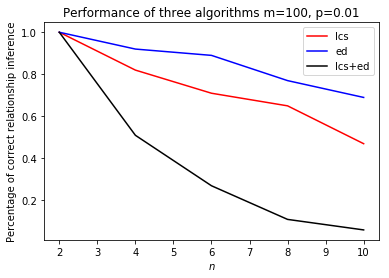

In [218]:
n_exp1 = n_vary_exp(.01, ['A','C','G','T'], 100, 100)

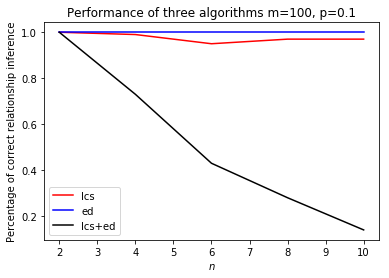

In [219]:
n_exp2 = n_vary_exp(.1, ['A','C','G','T'], 100, 100)

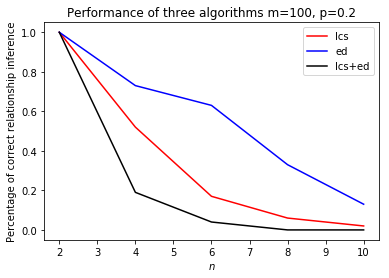

In [220]:
n_exp3 = n_vary_exp(.2, ['A','C','G','T'], 100, 100)

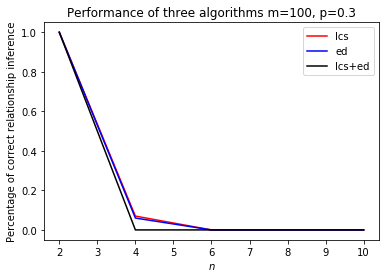

In [221]:
n_exp4 = n_vary_exp(.3, ['A','C','G','T'], 100, 100)

From the four simulations, we see that all:
1. As $n$ increase, the ancestry inferrence performs progressively worse.
2. Three metrics perform poorly when $p$ is large ($o=0.3$) or when the number of strings is large. We additionally note that using Levenshtein distance alone as our metric results in best results for $p=0.01, 0.1, 0.2$ . One noticeable result is when $p=0.1,$ where using Levenshtein distance gives an error rate of virtually $0\%$ for every value of $n$ ranging from 2 to 10.

### Experiment Set 2. How the algorithms perform as the probabilities of edit operations vary

In this set of experiment, the number of DNA strands $n$ and the number of bases of the original strand $m$ is kept fixed, and the probabilities of the edit operations are equal and let vary.

In [230]:
def p_vary_exp(n, vocab, m, iterations):
    """
    Generate a plot for the performance of the algorithms
    that use three metrics (lcs length, Levenshtein 
    distance, or both) with n being the independent 
    variable
    
    Inputs:
    - n: int, number strings
    - vocab: list of strings, vocab to build characters
    - m: the length of the original string
    - iterations: int, number of iterations
    """
    results = {'lcs':[], 'ed':[],'lcs_ed':[]}
    P = [.01,.05,.1,.15,.2,.3]
    for p in P:
        
        counts = {'lcs':0, 'ed':0,'lcs_ed':0}
        true_ancestry = true_ancestry_graph(n)
        for _ in range(iterations):
            parent = generate_string(m, vocab)
            data = generate_data(parent, p, p, p,
                  vocab, n, Queue(1000))
            tables = {'lcs': None,'ed':None,'lcs_ed':None}
            for metric in ['lcs','ed','lcs_ed']:
                if metric != 'lcs_ed':
                    tables[metric] = build_table_score(data, 
                                          metric, 
                                          verbose = False)
                else:
                    tables['lcs_ed'] = tables['ed']-tables['lcs']
            for metric in ['lcs','ed','lcs_ed']:
                inferred_ancestry = mst_from_table(tables[metric], 
                                                   verbose = False)
                if inferred_ancestry == true_ancestry:
                    counts[metric] += 1
        for metric in ['lcs','ed','lcs_ed']:
            results[metric].append(counts[metric]/iterations)
    plt.plot(P, results['lcs'], color='red',
             label='lcs')
    plt.plot(P, results['ed'], color='blue',
             label='ed')
    plt.plot(P, results['lcs_ed'], color='black',
             label='lcs+ed')
    title = 'Performance of three algorithms m='+str(m)+', n='+\
    str(n)
    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percentage of correct relationship inference')
    plt.legend()
    plt.show()
    return results

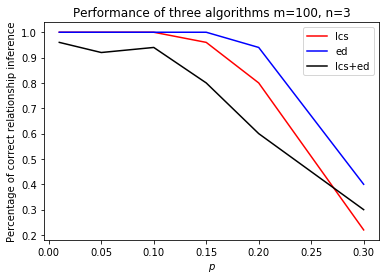

In [231]:
p_exp1 = p_vary_exp(3, ['A','C','G','T'], 100, 50)

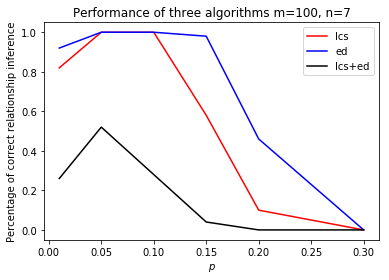

In [232]:
p_exp2 = p_vary_exp(7, ['A','C','G','T'], 100, 50)

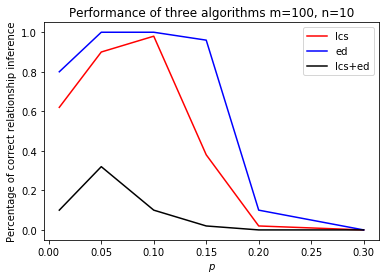

In [233]:
p_exp3 = p_vary_exp(10, ['A','C','G','T'], 100, 50)

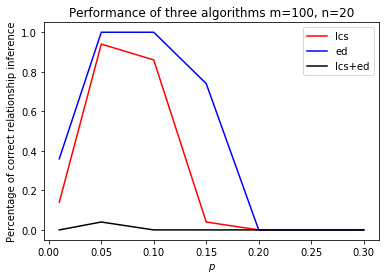

In [234]:
p_exp4 = p_vary_exp(20, ['A','C','G','T'], 100, 50)

Once again, Levenshtein is consistently the best metric to use here. Also, the metrics usually peroform best when $p$ is around 0.05 and 0.1.

## Strengths and Weaknesses of the General Strategy



# 5. Describe the complexity of your solution to identify related “genes” for this assignment. (Let M be the length of a gene, and N be the number of genes.)

There are a few steps to identify the relationship of the genes.
1. Building table of Levenshtein distances for all pairs of N genes (functions `edit_distance` and `build_table_score`)

Finding the Levenshtein distance between two genes X and Y of size M using the dynamic programming solution requires creating and filling up $(M+1)\times (M+1)$. To fill in each cell A[i,j] in the table, we need to do the following operations: (1) comparing the two characters $X[i-1]$ and $Y[j-1]$, (2) finding the minimum of three surrounding cells (in case $X[i-1]\neq Y[j-1]$), (3) filling in the cell with an approopriate value. As each of the three operations takes $O(1)$, filling in a cell takes $3O(1)=O(1)$. As there are $(M+1)\times (M+1)$ to fill in, finding the Levenshtein distance between $X$ and $Y$ takes:
$$O(1)\times(M+1)\times (M+1)=O(M^2)$$

Regarding the space complexity, we need not build an entire table. In the function `edit_distance` above, we can set `save_space=True` and the algorithm only creates a table of size $2\times(M+1)$. Therefore, the space complexity is:
$$S_1=O(2\times M)=O(M)$$

But this is just to find the distance for one pair of gene. To find the distances for all $N(N-1)/2$ pairs (using `build_table_score`, we need to run `edit_distance` $N(N-1)/2$ times and the resulted running time is:
$$T_1=N(N-1)\times O(M^2)=O(N^2M^2)$$



2. From the table, create an undirected graph (function `build_`


3. Find the MST from the graph.

# 6. How would you estimate the probabilities of mutation, insertions and deletions? (There might not be enough data to give meaningful estimates, but at least have a clear idea of the approach.)



In [310]:
def edit_distance(x, y, w_del, w_sub, w_ins, save_space = False):
    """
    Computes Levenshtein distance between strings x and y
    (transforming from x to y)
    w_del, w_sub, and w_ins are operation costs.
    
    Inputs:
    - x, y: strings
    - w_del, w_sub, w_ins: floats, costs of deletion, 
    substitution, and insertion
    - save_space: boolean, using a table with full size or 2 rows
    
    Outputs:
    - cost: float, the Levenshtein distance, if save_space = True
    - c: numpy array, the entire table, if save_space = False
    - b: (if save_space = False)numpy array, 
    """
    # get the lengths of 2 strings
    m = len(x)
    n = len(y)
    
    # create table to fill in based on space efficiency mode
    num_row = 2 if save_space else m+1
    c = np.zeros((num_row,n+1))
    b = np.chararray((num_row,n+1), 
                     unicode=True, 
                     itemsize = 2) if not save_space else None
    # fill in the first row
    for j in range(1,n+1):
        c[0,j] = c[0,j-1] + w_ins
        if not save_space:
            b[0,j] = 'in'  # insert 
        
    for i in range(m):
        # fill in the first cell of the current row
        num_row = 1 if save_space else i+1
        c[num_row,0] = c[num_row-1,0] + w_del
        if not save_space:
            b[num_row,0] = 'de'  #delete
        
        # fill in the other cells based on the recurrence
        for j in range(n):
            if x[i] == y[j]:
                
                c[num_row,j+1] = c[num_row-1,j]
                if not save_space:
                    b[num_row,j+1] = 'co' #copy
            else:
                contenders = [c[num_row-1,j+1] + w_del,
                                 c[num_row,j] + w_ins,
                                 c[num_row-1,j] + w_sub]
                c[num_row,j+1] = min(contenders)
                if not save_space:
                    first_min_pos = np.argmin(contenders)
                    all_min_pos = []
                    for k in range(len(contenders)):
                        if contenders[k] == contenders[first_min_pos]:
                            all_min_pos.append(k)
                    chosen_pos = np.random.choice(all_min_pos)
                    if chosen_pos == 0:
                        b[num_row,j+1] = 'de' #delete
                    elif chosen_pos == 1:
                        b[num_row,j+1] = 'in' #insert
                    else:
                        b[num_row,j+1] = 'su' #substitution
                    
        
        # if space efficiency mode is on, delete the previous row
        # adds another row below the current table to fill in
        # in the next iteration
        if save_space:
            c = np.delete(c, 0, 0)
            c = np.vstack([c,np.zeros((1,n+1))])
    if save_space:
        return c[0,-1]
    else:
        return c,b
result = 3
x = 'kitten'
y = 'sitting'
assert(np.array_equal(edit_distance(x,y,1,1,1,save_space=True), result)) 
assert(np.array_equal(edit_distance(x,y,1,1,1,save_space=False)[0][-1,-1], result)) 

In [311]:
def string_align(b,x,y,i,j,aligned1=None,aligned2=None,stats=None):
    """
    Outputs:
    - out: (if visualize is True) two strings aligned, for example:
    A_CGT
    _BCCT
    - stats: a tuple of four numbers:
        * num_del: number of deletions
        * num_ins: number of insertions
        * num_sub: number of substitutions
        * num_cop:
        * len_aligned: 
    """
    if not stats:
        stats = {'num_del':0, 'num_ins':0,
                'num_cop':0, 'num_sub':0}
    if not aligned1:
        aligned1 = ''
    if not aligned2:
        aligned2 = ''
    if i==0 and j==0:
        return aligned1, aligned2, stats
    if b[i,j] == 'de':
        aligned1 = x[i-1] + aligned1
        aligned2 = '_' + aligned2
        stats['num_del'] += 1
        aligned1, aligned2, stats = string_align(b,x,y,i-1,j,
                                                 aligned1,aligned2,
                                                stats)
    elif b[i,j] == 'co':
        aligned1 = x[i-1] + aligned1
        aligned2 = y[j-1] + aligned2
        stats['num_cop'] += 1
        aligned1, aligned2, stats = string_align(b,x,y,i-1,j-1,
                                                 aligned1,aligned2,
                                                stats)
    elif b[i,j] == 'in':
        aligned1 = '_' + aligned1
        aligned2 = y[j-1] + aligned2
        stats['num_ins'] += 1
        aligned1, aligned2, stats = string_align(b,x,y,i,j-1,
                                                 aligned1,aligned2,
                                                stats)
    else:
        aligned1 = x[i-1] + aligned1
        aligned2 = y[j-1] + aligned2
        stats['num_sub'] += 1
        aligned1, aligned2, stats = string_align(b,x,y,i-1,j-1,
                                                 aligned1,aligned2,
                                                stats)

    return aligned1, aligned2, stats
x = 'Monday'
y = 'Saturday'
c,b = edit_distance(x, y, 1,1,1, save_space = False)
aligned1, aligned2, stats = string_align(b,x,y,len(x),len(y))
print(aligned1)
print(aligned2)
print(stats)

Mon__day
Saturday
{'num_del': 0, 'num_ins': 2, 'num_cop': 3, 'num_sub': 3}


In [315]:
strings = [(0, 'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'),
           (1, 'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA') ,
           (2, 'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA') ,
           (3, 'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA') ,
           (4, 'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA') ,
           (5, 'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC') ,
           (6, 'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC') 
          ]
num_edits = {'num_del':0, 'num_ins':0, 'num_sub':0}
tot_operation = 0
for genes in [(0,6),(0,4),(6,2),(6,5),(4,3),(4,1)]:
    x,y = strings[genes[0]][1], strings[genes[1]][1]
    c,b = edit_distance(x,y, 1, 1, 1, save_space = False)
    aligned1, aligned2, stats = string_align(b,x,y,len(x),len(y))
    tot_operation += len(aligned1)
    for operation in ['num_del','num_sub','num_ins']:
        num_edits[operation] += stats[operation]
print('Probability of deletion is:', num_edits['num_del']/tot_operation)
print('Probability of substitution is:', num_edits['num_sub']/tot_operation)
print('Probability of insertion is:', num_edits['num_ins']/tot_operation)
    

Probability of deletion is: 0.06750392464678179
Probability of substitution is: 0.07535321821036106
Probability of insertion is: 0.058084772370486655
